In [1]:
import numpy as np
import cv2

## 영상의 산술 연산 

영상은 일종의 2차원 행렬이기 떄문에 행렬의 산술 연산(arithmetic operation)을 그대로 적용 가능  
두 개의 영상을 서로 더하거나 빼는 연산을 수행함으로써 새로운 결과 영상을 생성 

덧셈 연산을 수행할 때 역시 saturate 연산을 신경써야 한다.  
이전에 수행했었던 add 함수를 사용한다.  
이전에는 스칼라 값을 사용해도 브로드캐스팅되어 자동으로 모든 픽셀에 더해졌었다.  

그러나, 사실은 크기가 동일한 두 영상을 더하는 것이다.  
인자로, 두 넘파이 이미지 배열을 넣으면, 원소별 덧셈 연산을 한다. 

두 영상을 더할 때 각 영상에 가중치를 부여하는 경우 :  
$$dst(x, y) = saturate(a*src1(x, y) + b*src2(x, y))$$

openCV에서 가중치 합을 구할 때, addWeighted() 함수를 사용  
빼는 연산은 subtract() 연산 사용, 인자 구성은 add 함수와 동일 

차이 연산으로 구한 영상을 **차영상**이라고 함  
차이 연산을 수식으로 표현하면 다음과 같음  
$$dst(x, y) = |src1(x, y) - src2(x, y)|$$

openCV에서는 absdiff() 함수를 이용하여 차영상을 구할 수 있음 

차이 연산을 이용하면 두 개의 영상에서 변화가 있는 영역을 쉽게 찾을 수 있음  
왼쪽 영상은 움직임이 없는 정적인 배경 영상이고, 가운데 영상은 자동차가 지나가고 있을 때 촬영된 영상임 

영상을 이용한 행렬의 곱셈을 수행하는 경우는 거의 없음  
픽셀 값끼리 서로 곱하거나 나누는 연산을 수행 가능  
openCV에서는 multiply(), divide() 함수를 함께 제공함 

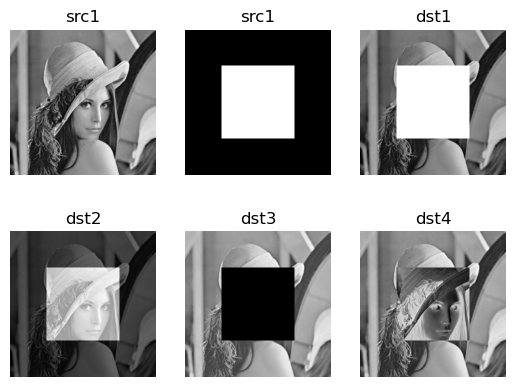

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

src1 = cv2.imread('data/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('data/square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed')
    exit()

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0) # 0.5 * src1 + 0.5 * src2 + 0.0
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src1')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('dst1')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('dst2')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('dst3')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('dst4')

plt.show()